### Logistic Regression - Social Network ads

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Loading the data

In [34]:
df = pd.read_csv("Social_Network_Ads.csv",index_col=0)
df.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0


#### EDA

In [35]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

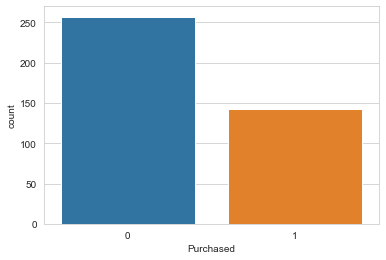

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased',data=df)

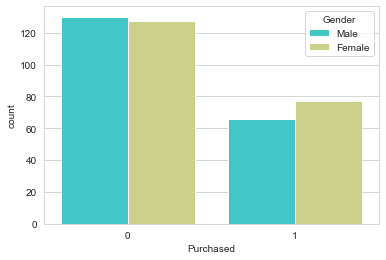

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased',hue='Gender',data=df,palette='rainbow')

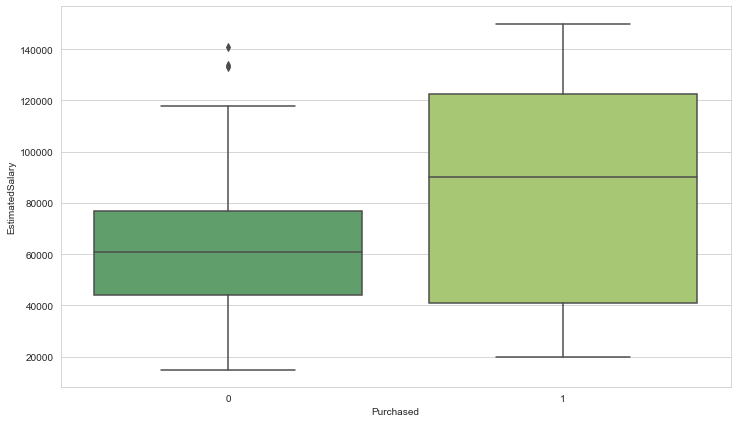

In [38]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Purchased',y='EstimatedSalary',data=df,palette='summer')

In [39]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


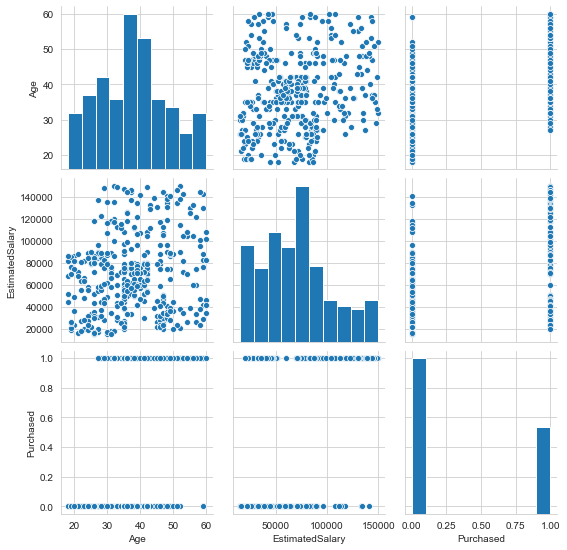

In [40]:

sns.pairplot(df)


#### Label encoding the gender

In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values MALE-1 , FEMALE-0
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df.head() 

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,1,19,19000,0
15810944,1,35,20000,0
15668575,0,26,43000,0
15603246,0,27,57000,0
15804002,1,19,76000,0


#### Data normalization

In [43]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Purchased',axis=1))
X.shape

(400, 3)

In [44]:
Y = df['Purchased']
Y.shape

(400,)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

#### Logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred = logreg.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[56,  2],
       [ 5, 17]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
acc

0.9125

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80

